# Random Forest

Le modèle Random Forest est un algorithme de machine learning utilisé pour classer un élément dans une catégorie OUI/NON (binaire).

Il crée plusieurs arbres de décision à partir des données d’entraînement, chacun apprenant sur un sous-échantillon différent (tirage aléatoire des données et des caractéristiques).

Chaque arbre donne sa propre prédiction (malade ou non malade), puis le modèle final choisit la majorité des votes.

S’il y a plus d’arbres qui prédisent "malade", alors la forêt prédit "malade" (1), sinon elle prédit "non malade" (0).

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


In [6]:
# Récupérer le dossier courant
BASE_DIR = os.getcwd()

# Construire le chemin relatif vers le fichier CSV
csv_path = os.path.join(BASE_DIR, '..', 'données', 'donnée_malades_cardiaques.csv')

# Chargement des données
df = pd.read_csv(csv_path, index_col=0)

df

,Âge,Sexe,Tension_aurepos,Cholestérol,Glycémieà_jeun,Fréquence_cardiaque_max,Angine_d_effort,Dépression_ST,Maladie_cardiaque,Type_de_douleur_thoracique_ASY,Type_de_douleur_thoracique_ATA,Type_de_douleur_thoracique_NAP,Type_de_douleur_thoracique_TA,ECG_au_repos_LVH,ECG_au_repos_Normal,ECG_au_repos_ST,Pente_ST_Down,Pente_ST_Flat,Pente_ST_Up
0,40,1,140,289,0,172,0,0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1,1,0,0,0,1,0,1,0,0,1,0
914,68,1,144,193,1,141,0,3,1,1,0,0,0,0,1,0,0,1,0
915,57,1,130,131,0,115,1,1,1,1,0,0,0,0,1,0,0,1,0
916,57,0,130,236,0,174,0,0,1,0,1,0,0,1,0,0,0,1,0


In [7]:
# Supposons que la colonne cible s'appelle 'target' et que les autres colonnes sont les caractéristiques
X = df.drop(columns=["Maladie_cardiaque"])
Y = df["Maladie_cardiaque"]

# Séparation en ensemble d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

max_accuracy = 0  # Initialisation de la précision maximale

# Boucle pour tester différentes valeurs de `random_state`
for x in range(50):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train, Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf, Y_test) * 100, 2)

    # Mise à jour de la meilleure précision et du meilleur `random_state`
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_x = x

# Création du modèle avec la meilleure valeur de `random_state`
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)

# Affichage de la précision finale
score_rf = round(accuracy_score(Y_pred_rf, Y_test) * 100, 2)
print("Le score de précision obtenu en utilisant Random Forest est : " + str(score_rf) + " %")


Le score de précision obtenu en utilisant Random Forest est : 91.3 %


In [8]:
print(confusion_matrix(Y_test, Y_pred_rf))
print(classification_report(Y_test, Y_pred_rf))

[[ 64   8]
 [  8 104]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        72
           1       0.93      0.93      0.93       112

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184



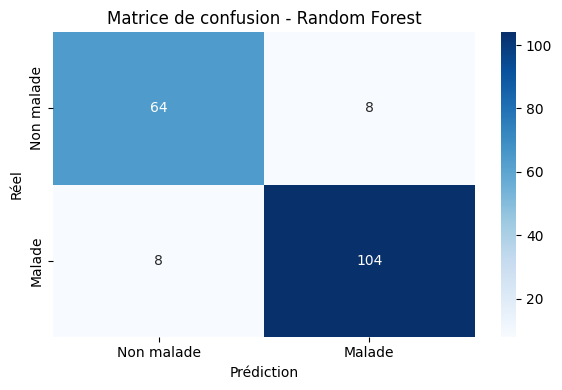

In [ ]:
from sklearn.metrics import roc_curve, auc

# 1. Matrice de confusion
plt.figure(figsize=(6,4))
cm = confusion_matrix(Y_test, Y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Non malade", "Malade"], 
            yticklabels=["Non malade", "Malade"])
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.title("Matrice de confusion - Random Forest")
plt.tight_layout()
plt.show()

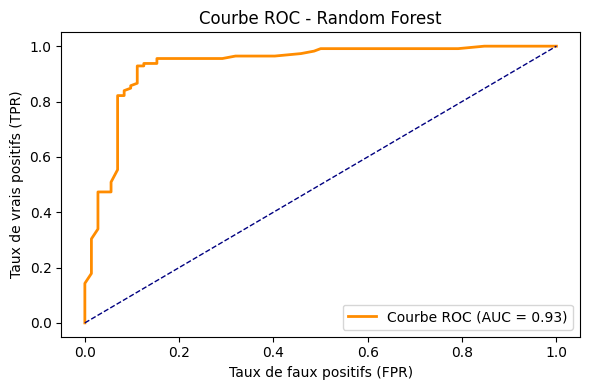

In [13]:
# 2. Courbe ROC
Y_proba_rf = rf.predict_proba(X_test)[:, 1]  # Probabilité d'être malade
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"Courbe ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC - Random Forest")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

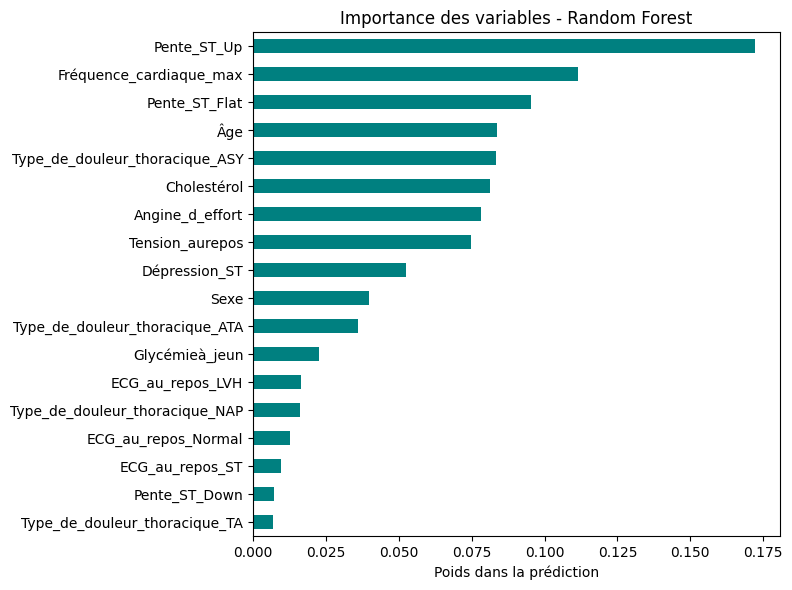

In [14]:
# 3. Importance des variables
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(8,6))
feature_importances.plot(kind="barh", color="teal")
plt.title("Importance des variables - Random Forest")
plt.xlabel("Poids dans la prédiction")
plt.tight_layout()
plt.show()

In [10]:
# Caractéristiques du patient
nouveau_patient = np.array([[38,1,138,175,0,173,0,0,0,0,1,0,0,1,0,0,0,1]])  # Remplace les valeurs si nécessaire

# Vérifier la taille de l'entrée
print("Dimensions du patient :", nouveau_patient.shape)

Dimensions du patient : (1, 18)


In [11]:
# Prédiction
prediction = rf.predict(nouveau_patient)

# Affichage du résultat
if prediction[0] == 1:
    print("Le modèle prédit que le patient est MALADE.")
else:
    print("Le modèle prédit que le patient est EN BONNE SANTÉ.")


Le modèle prédit que le patient est EN BONNE SANTÉ.


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [12]:
# Probabilités des classes [probabilité d'être sain, probabilité d'être malade]
probabilites = rf.predict_proba(nouveau_patient)

print(f"Probabilité d'être sain : {probabilites[0][0]*100:.2f}%")
print(f"Probabilité d'être malade : {probabilites[0][1]*100:.2f}%")

Probabilité d'être sain : 100.00%
Probabilité d'être malade : 0.00%


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
